In [1]:
# Cell 1: Path & basic imports

import os
from PIL import Image
import matplotlib.pyplot as plt

DATA_ROOT = "../mvtec_anomaly_detection"


In [2]:
# Cell 2: List products

products = sorted([
    d for d in os.listdir(DATA_ROOT)
    if os.path.isdir(os.path.join(DATA_ROOT, d))
])

print(f"Number of products: {len(products)}")
print(products)


Number of products: 15
['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']


In [3]:
# Cell 3: Sanity check folder structure

for p in products:
    train_good = os.path.join(DATA_ROOT, p, "train", "good")
    test_dir = os.path.join(DATA_ROOT, p, "test")
    gt_dir = os.path.join(DATA_ROOT, p, "ground_truth")

    assert os.path.exists(train_good), f"Missing {train_good}"
    assert os.path.exists(test_dir), f"Missing {test_dir}"
    assert os.path.exists(gt_dir), f"Missing {gt_dir}"

print("All products have valid structure")


All products have valid structure


In [4]:
# Cell 4: Count images per product

for p in products:
    train_good = os.path.join(DATA_ROOT, p, "train", "good")
    num_train = len(os.listdir(train_good))

    test_dir = os.path.join(DATA_ROOT, p, "test")
    num_test = sum(
        len(os.listdir(os.path.join(test_dir, c)))
        for c in os.listdir(test_dir)
    )

    print(f"{p:12s} | train_good: {num_train:4d} | test_total: {num_test:4d}")


bottle       | train_good:  209 | test_total:   83
cable        | train_good:  224 | test_total:  150
capsule      | train_good:  219 | test_total:  132
carpet       | train_good:  280 | test_total:  117
grid         | train_good:  264 | test_total:   78
hazelnut     | train_good:  391 | test_total:  110
leather      | train_good:  245 | test_total:  124
metal_nut    | train_good:  220 | test_total:  115
pill         | train_good:  267 | test_total:  167
screw        | train_good:  320 | test_total:  160
tile         | train_good:  230 | test_total:  117
toothbrush   | train_good:   60 | test_total:   42
transistor   | train_good:  213 | test_total:  100
wood         | train_good:  247 | test_total:   79
zipper       | train_good:  240 | test_total:  151


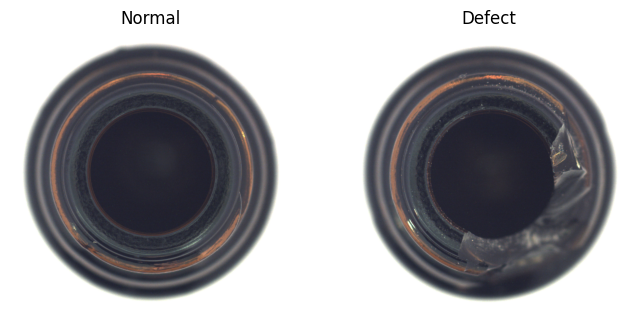

In [5]:
# Cell 5: Visualize sample images

p = products[0]  # thử với product đầu tiên
train_img = os.listdir(f"{DATA_ROOT}/{p}/train/good")[0]

defect_classes = [
    c for c in os.listdir(f"{DATA_ROOT}/{p}/test")
    if c != "good"
]
defect_img = os.listdir(f"{DATA_ROOT}/{p}/test/{defect_classes[0]}")[0]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(Image.open(f"{DATA_ROOT}/{p}/train/good/{train_img}"))
ax[0].set_title("Normal")
ax[0].axis("off")

ax[1].imshow(Image.open(f"{DATA_ROOT}/{p}/test/{defect_classes[0]}/{defect_img}"))
ax[1].set_title("Defect")
ax[1].axis("off")

plt.show()


### Dataset Summary
- Total products: 15
- Training data: only normal images
- Defect types vary by product
- Ground truth masks available for localization

=> Dataset is suitable for unsupervised anomaly detection.
